This is the primary notebook we used throughout the datathon, which includes data cleaning, visualization, and trying out different models.

See the other notebook for the final model and test result

# Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024 datathon/Train/chevron_training.csv')


In [ ]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                          0
surface_x                           0
surface_y                           0
bh_x                             2087
bh_y                             2087
standardized_operator_name          0
gross_perforated_length          7557
number_of_stages                26940
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
average_stage_length            26968
average_proppant_per_stage      27003
average_frac_fluid_per_stage    27005
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
pad_id                              0
relative_well_position           9225
batch_frac_classification        9225
well_family_relationship         9225
frac_type                           0
frac_seasoning                  14924
horizontal_m

In [ ]:
#all the rows that have frac_type = Refrac where OilPeakRate is not null
df[df['frac_type'] == 'Refrac'][df['OilPeakRate'].notnull()]


<ipython-input-119-a91477ccbb5d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['frac_type'] == 'Refrac'][df['OilPeakRate'].notnull()]


,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate


In [ ]:
df.drop('frac_type', axis=1, inplace=True)

In [ ]:
#drop all rows that do not have peak data
before_rows = df.shape[0]
df.dropna(subset=["OilPeakRate"], axis=0, inplace=True)
after_rows = df.shape[0]
print("Number of dropped rows {}".format(before_rows - after_rows))

Number of dropped rows 10386


In [ ]:

df.drop('Unnamed: 0', axis=1, inplace=True)
df

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,pad_id,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1.383494e+06,7.173292e+05,1.382855e+06,7.127674e+05,1121,3963.582677,NaN,76000.00000,NaN,8712.598425,...,102604,Standalone Well,Unknown,Standalone Well,NaN,1.383031e+06,7.147964e+05,1.382669e+06,7.127984e+05,46.623023
1,1.380344e+06,7.119163e+05,1.379738e+06,7.078606e+05,1022,3179.133858,NaN,113000.00000,5.610964e+05,8627.952756,...,108497,Outer Well,Unknown,Infill Child Well,NaN,1.379965e+06,7.095417e+05,1.379630e+06,7.079077e+05,59.750009
2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,1304,3810.039370,12.0,286571.42860,1.621424e+06,8801.181102,...,108526,Standalone Well,Non-Batch Frac,Standalone Well,92.0,1.379357e+06,7.153812e+05,1.378960e+06,7.135304e+05,10.785716
3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,1022,3723.425197,11.0,106878.92860,4.377134e+05,8635.826772,...,105631,Standalone Well,Unknown,Standalone Well,NaN,1.383100e+06,7.040589e+05,1.382727e+06,7.020985e+05,123.797638
4,1.378963e+06,7.026240e+05,1.379644e+06,7.072049e+05,1022,3811.023622,NaN,112789.71430,6.229802e+05,8664.370079,...,103717,Outer Well,Unknown,Infill Child Well,NaN,1.379546e+06,7.051508e+05,1.379987e+06,7.071237e+05,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,9.435419e+05,1.059277e+06,1018,4101.377953,NaN,95857.14286,5.499711e+05,8877.952756,...,116688,Standalone Well,Unknown,Standalone Well,NaN,9.402878e+05,1.060680e+06,9.387423e+05,1.061414e+06,162.307168
29433,9.593475e+05,1.033564e+06,9.637629e+05,1.031391e+06,1018,4512.795276,NaN,NaN,NaN,8479.330709,...,115768,Outer Well,Non-Batch Frac,Sibling Well,14.0,9.618238e+05,1.032362e+06,9.638230e+05,1.031362e+06,171.071455
29434,9.669162e+05,1.057804e+06,9.709082e+05,1.056045e+06,1164,3660.433071,NaN,87857.14286,6.214390e+05,8640.748031,...,106510,Standalone Well,Non-Batch Frac,Standalone Well,72.0,9.692139e+05,1.056818e+06,9.709078e+05,1.056042e+06,7.171827
29435,9.462629e+05,1.034169e+06,9.525089e+05,1.031066e+06,1018,5930.118110,NaN,383857.14290,1.956479e+06,8389.763780,...,107305,Standalone Well,Non-Batch Frac,Standalone Well,15.0,9.498084e+05,1.032405e+06,9.525121e+05,1.031066e+06,336.044270


In [ ]:
df.dtypes

surface_x                       float64
surface_y                       float64
bh_x                            float64
bh_y                            float64
standardized_operator_name        int64
gross_perforated_length         float64
number_of_stages                float64
total_proppant                  float64
total_fluid                     float64
true_vertical_depth             float64
ffs_frac_type                    object
proppant_intensity              float64
frac_fluid_intensity            float64
average_stage_length            float64
average_proppant_per_stage      float64
average_frac_fluid_per_stage    float64
proppant_to_frac_fluid_ratio    float64
frac_fluid_to_proppant_ratio    float64
bin_lateral_length              float64
pad_id                            int64
relative_well_position           object
batch_frac_classification        object
well_family_relationship         object
frac_seasoning                  float64
horizontal_midpoint_x           float64


In [ ]:
# Sort the missing values table by the proportion of missing values
missing_values_table = missing_values_table.sort_values(by='Proportion of Missing Values', ascending=False)e
print("Sorted Missing Values Table:")
print(missing_values_table)

pivot_table = missing_values_table.pivot_table(index='Column', values='Proportion of Missing Values')

print("\nPivot Table:")
print(pivot_table)


Sorted Missing Values Table:
                          Column  Proportion of Missing Values
12  average_frac_fluid_per_stage                      0.909504
11    average_proppant_per_stage                      0.909437
10          average_stage_length                      0.908258
3               number_of_stages                      0.907315
7                  ffs_frac_type                      0.508790
19                frac_seasoning                      0.502627
14  frac_fluid_to_proppant_ratio                      0.371683
13  proppant_to_frac_fluid_ratio                      0.371683
9           frac_fluid_intensity                      0.361916
8             proppant_intensity                      0.361074
5                    total_fluid                      0.357537
4                 total_proppant                      0.357403
17     batch_frac_classification                      0.310690
18      well_family_relationship                      0.310690
16        relative_well_po

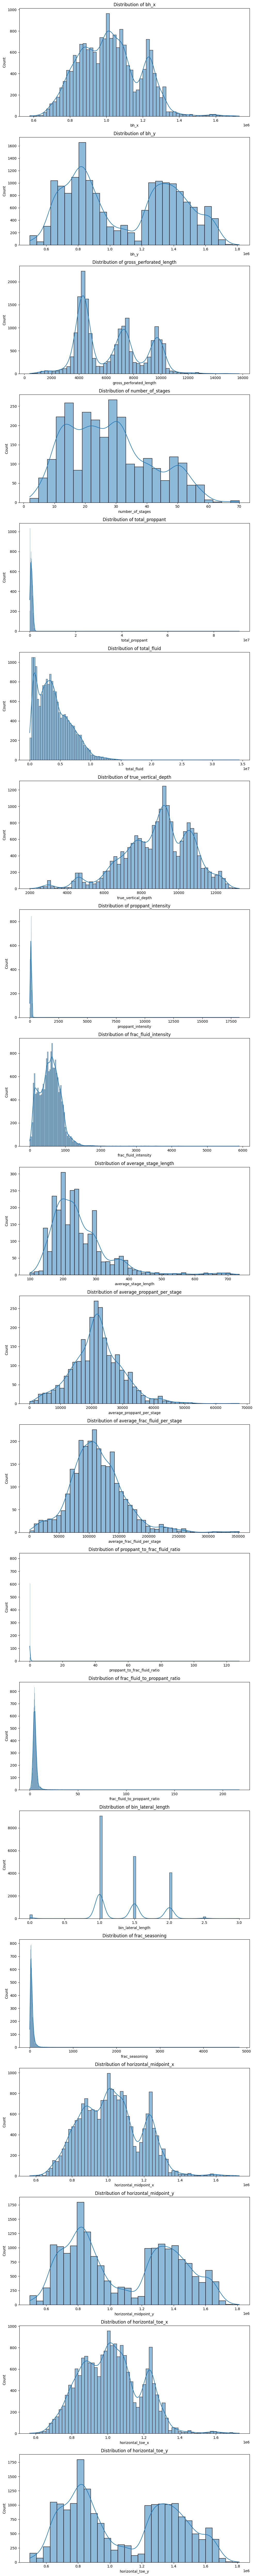

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


columns_with_missing = df.columns[df.isnull().any()]

# Plot histograms for numerical columns among with missing values
numerical_columns_with_missing = df[columns_with_missing].select_dtypes(include='float64').columns


fig, axes = plt.subplots(nrows=len(numerical_columns_with_missing), ncols=1, figsize=(10, 5 * len(numerical_columns_with_missing)))
for i, column in enumerate(numerical_columns_with_missing):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()


In [ ]:

# Set the threshold for missing proportion. reference:
# https://www.researchgate.net/figure/Effect-of-threshold-selection-on-the-relative-proportion-of-missing-data-and-the-number_fig1_327942436
missing_threshold = 0.3


columns_to_drop = df.columns[df.isnull().mean() >= missing_threshold]
df_dropped = df.drop(columns=columns_to_drop)
columns_to_drop


Index(['number_of_stages', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage'],
      dtype='object')

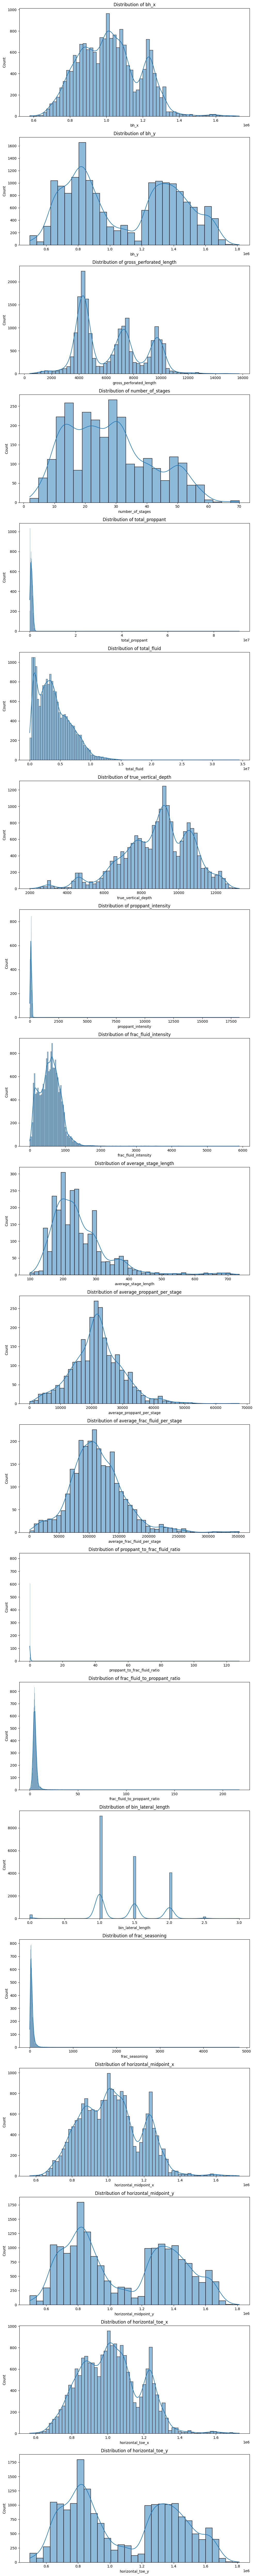

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# columns with missing values again
columns_with_missing = df.columns[df.isnull().any()]
numerical_columns_with_missing = df[columns_with_missing].select_dtypes(include='float64').columns

fig, axes = plt.subplots(nrows=len(numerical_columns_with_missing), ncols=1, figsize=(10, 5 * len(numerical_columns_with_missing)))

# again, plot histograms for numerical columns
for i, column in enumerate(numerical_columns_with_missing):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


In [ ]:
# Impute missing values for numerical columns with median when the data distribution is skewed or contains outliers.
numerical_columns = df.select_dtypes(include='float64').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())



In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Column: {column}, data type: {df[column].dtype}")
    print(df[column].value_counts())

Column: ffs_frac_type, data type: object
Slickwater Only                4903
Slickwater Crosslink Hybrid    4358
Slickwater Linear Hybrid       3079
Undefined                      1002
Crosslink Only                  894
Linear Only                      74
Name: ffs_frac_type, dtype: int64
Column: relative_well_position, data type: object
Standalone Well    8138
Outer Well         5964
Inner Well         4748
Unknown             456
Name: relative_well_position, dtype: int64
Column: batch_frac_classification, data type: object
Non-Batch Frac           7043
Unknown                  4844
Batch-Concurrent Frac    4613
Batch-Sequential Frac    2806
Name: batch_frac_classification, dtype: int64
Column: well_family_relationship, data type: object
Standalone Well      8138
Sibling Well         7030
Infill Child Well    3682
Unknown               456
Name: well_family_relationship, dtype: int64


In [ ]:
df.isna().sum()

surface_x                       0
surface_y                       0
bh_x                            0
bh_y                            0
standardized_operator_name      0
gross_perforated_length         0
number_of_stages                0
total_proppant                  0
total_fluid                     0
true_vertical_depth             0
ffs_frac_type                   0
proppant_intensity              0
frac_fluid_intensity            0
average_stage_length            0
average_proppant_per_stage      0
average_frac_fluid_per_stage    0
proppant_to_frac_fluid_ratio    0
frac_fluid_to_proppant_ratio    0
bin_lateral_length              0
pad_id                          0
relative_well_position          0
batch_frac_classification       0
well_family_relationship        0
frac_seasoning                  0
horizontal_midpoint_x           0
horizontal_midpoint_y           0
horizontal_toe_x                0
horizontal_toe_y                0
OilPeakRate                     0
dtype: int64

In [ ]:
# Create mappings (prepare for neural network imputation)
ffs_frac_type_mapping = {
    'Slickwater Only': 1,
    'Slickwater Crosslink Hybrid': 2,
    'Slickwater Linear Hybrid': 3,
    'Undefined': 4,
    'Crosslink Only': 5,
    'Linear Only': 6
}


df['ffs_frac_type'] = df['ffs_frac_type'].map(ffs_frac_type_mapping)


relative_well_position_mapping = {
    'Standalone Well': 1,
    'Outer Well': 2,
    'Inner Well': 3,
    'Unknown': 4
}

df['relative_well_position'] = df['relative_well_position'].map(relative_well_position_mapping)


batch_frac_classification_mapping = {
    'Non-Batch Frac': 1,
    'Unknown': 2,
    'Batch-Concurrent Frac': 3,
    'Batch-Sequential Frac': 4
}
df['batch_frac_classification'] = df['batch_frac_classification'].map(batch_frac_classification_mapping)


well_family_relationship_mapping = {
    'Standalone Well': 1,
    'Sibling Well': 2,
    'Infill Child Well': 3,
    'Unknown': 4
}

df['well_family_relationship'] = df['well_family_relationship'].map(well_family_relationship_mapping)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

categorical_columns_with_missing = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship']

target_column_mappings = {
    'ffs_frac_type': {'Slickwater Only': 1, 'Slickwater Crosslink Hybrid': 2, 'Slickwater Linear Hybrid': 3, 'Undefined': 4, 'Crosslink Only': 5, 'Linear Only': 6},
    'relative_well_position': {'Standalone Well': 1, 'Outer Well': 2, 'Inner Well': 3, 'Unknown': 4},
    'batch_frac_classification': {'Non-Batch Frac': 1, 'Unknown': 2, 'Batch-Concurrent Frac': 3, 'Batch-Sequential Frac': 4},
    'well_family_relationship': {'Standalone Well': 1, 'Sibling Well': 2, 'Infill Child Well': 3, 'Unknown': 4}
}

df.replace([np.inf, -np.inf], np.nan, inplace=True)
for column in categorical_columns_with_missing:
    if column in df.columns:
        X = df.drop([column], axis=1)
        y = df[column]

        if y.isnull().any():
            not_nan_indices = ~y.isnull()
            X = X[not_nan_indices]
            y = y[not_nan_indices]

        known_values = df.dropna(subset=[column])
        unknown_values = df[df[column].isnull()]
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)
        unknown_values_imputed = imputer.transform(unknown_values.drop([column], axis=1))

        regression_model = LinearRegression()
        regression_model.fit(X_imputed, y)

        # Predict missing values
        predicted_values = regression_model.predict(unknown_values_imputed)
        df.loc[df[column].isnull(), column] = predicted_values

        # Reverse mapping for the column
        reverse_mapping_column = {v: k for k, v in target_column_mappings[column].items()}

        df[column] = df[column].map(reverse_mapping_column)



ValueError: Found array with 0 sample(s) (shape=(0, 28)) while a minimum of 1 is required by SimpleImputer.

In [ ]:
categorical_columns_with_missing = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship']

random_indices = np.random.choice(df.index, size=df[categorical_columns_with_missing].isnull().sum().sum(), replace=True)


for column in categorical_columns_with_missing:
    unique_categories = df[column].dropna().unique()
    missing_mask = df[column].isnull()
    df.loc[missing_mask, column] = np.random.choice(unique_categories, size=missing_mask.sum(), replace=True)

print("DataFrame after Random Sampling for Imputation:")
print(df)


DataFrame after Random Sampling for Imputation:
          surface_x     surface_y          bh_x          bh_y  \
0      1.383494e+06  7.173292e+05  1.382855e+06  7.127674e+05   
1      1.380344e+06  7.119163e+05  1.379738e+06  7.078606e+05   
2      1.379916e+06  7.178450e+05  1.379275e+06  7.134720e+05   
3      1.383567e+06  7.066402e+05  1.382891e+06  7.020684e+05   
4      1.378963e+06  7.026240e+05  1.379644e+06  7.072049e+05   
...             ...           ...           ...           ...   
29432  9.477118e+05  1.057502e+06  9.435419e+05  1.059277e+06   
29433  9.593475e+05  1.033564e+06  9.637629e+05  1.031391e+06   
29434  9.669162e+05  1.057804e+06  9.709082e+05  1.056045e+06   
29435  9.462629e+05  1.034169e+06  9.525089e+05  1.031066e+06   
29436  9.467048e+05  1.035064e+06  9.529474e+05  1.031939e+06   

       standardized_operator_name  gross_perforated_length  number_of_stages  \
0                            1121              3963.582677               NaN   
1          

In [ ]:
df.isnull().sum()

surface_x                       0
surface_y                       0
bh_x                            0
bh_y                            0
standardized_operator_name      0
gross_perforated_length         0
number_of_stages                0
total_proppant                  0
total_fluid                     0
true_vertical_depth             0
ffs_frac_type                   0
proppant_intensity              0
frac_fluid_intensity            0
average_stage_length            0
average_proppant_per_stage      0
average_frac_fluid_per_stage    0
proppant_to_frac_fluid_ratio    0
frac_fluid_to_proppant_ratio    1
bin_lateral_length              0
pad_id                          0
relative_well_position          0
batch_frac_classification       0
well_family_relationship        0
frac_seasoning                  0
horizontal_midpoint_x           0
horizontal_midpoint_y           0
horizontal_toe_x                0
horizontal_toe_y                0
OilPeakRate                     0
dtype: int64

In [ ]:
df.describe()

# Data visualization

In [ ]:
# Binning Data https://www.kaggle.com/code/prakharrathi25/data-wrangling

In [ ]:
import pandas as pd


# Extract numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations
correlations = df[numerical_columns].corrwith(df['OilPeakRate'])

# Rank correlations based on absolute values
ranked_correlations = correlations.abs().sort_values(ascending=False)

# Display the ranked correlations
print("Ranked Correlations with OilPeakRate:")
print(ranked_correlations)


Ranked Correlations with OilPeakRate:
OilPeakRate                     1.000000
total_fluid                     0.447488
gross_perforated_length         0.402726
bin_lateral_length              0.400145
true_vertical_depth             0.384515
frac_fluid_intensity            0.372393
average_proppant_per_stage      0.371857
number_of_stages                0.370949
average_frac_fluid_per_stage    0.317448
total_proppant                  0.286878
average_stage_length            0.271613
proppant_intensity              0.157164
bh_y                            0.098091
horizontal_midpoint_y           0.088819
horizontal_toe_y                0.088708
surface_y                       0.088519
standardized_operator_name      0.037613
bh_x                            0.018243
proppant_to_frac_fluid_ratio    0.015467
frac_seasoning                  0.013335
horizontal_toe_x                0.011939
horizontal_midpoint_x           0.011710
surface_x                       0.010566
pad_id             

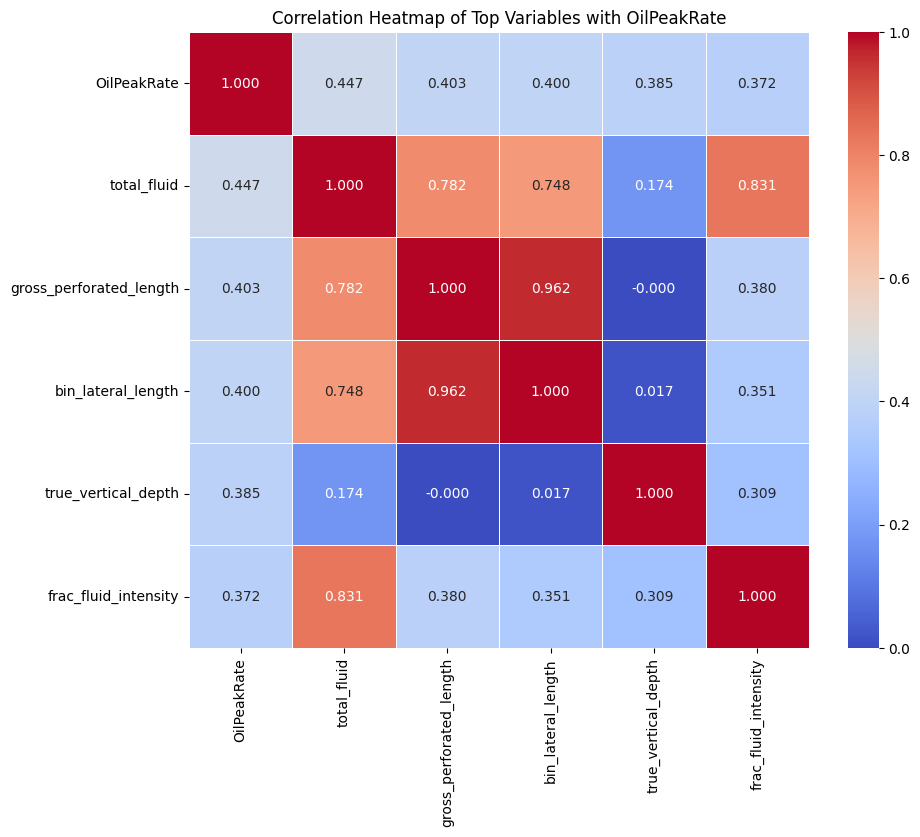

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset with modified dummy variables
# Also assuming 'OilPeakRate' and the top correlational variables are available

# Extract the top correlational variables
top_variables = ['OilPeakRate', 'total_fluid', 'gross_perforated_length', 'bin_lateral_length', 'true_vertical_depth', 'frac_fluid_intensity',]

# Subset the DataFrame with the top variables
df_top_correlations = df[top_variables]

# Calculate the correlation matrix
correlation_matrix = df_top_correlations.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Heatmap of Top Variables with OilPeakRate')
plt.show()


In [ ]:
key_numerical_variables = ['total_fluid', 'gross_perforated_length',  'true_vertical_depth']

# bin_lateral_length' and 'frac_fluid_intensity' are too correlated with others

total_fluid : The Pearson Correlation Coefficient is 0.4321943126643133  with a P-value of P = 0.0


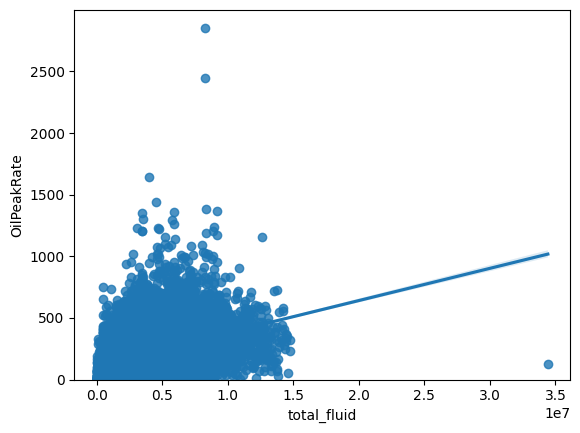

gross_perforated_length : The Pearson Correlation Coefficient is 0.40010987584323576  with a P-value of P = 0.0


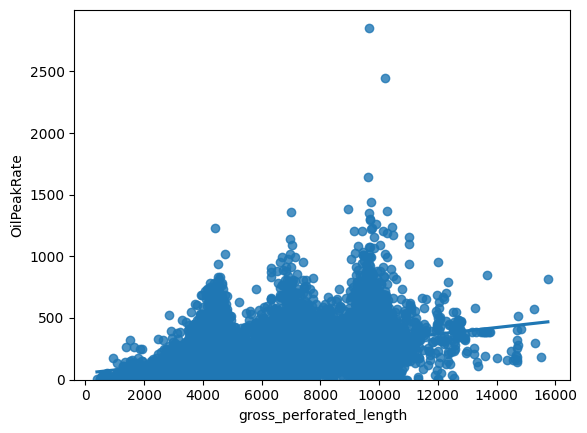

true_vertical_depth : The Pearson Correlation Coefficient is 0.3824864482431076  with a P-value of P = 0.0


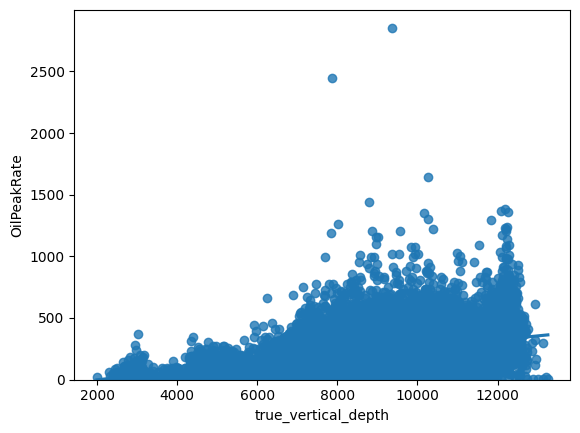

In [ ]:
# Correlation Coefficient and P-value

from scipy import stats

for col in key_numerical_variables:
    pearson_coef, p_value = stats.pearsonr(df[col], df['OilPeakRate'])
    print(col,": The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    # Continuous numerical variables: scatterplots with fitted lines.
    sns.regplot(x = col, y = 'OilPeakRate', data = df)
    plt.ylim(0, )
    plt.show()


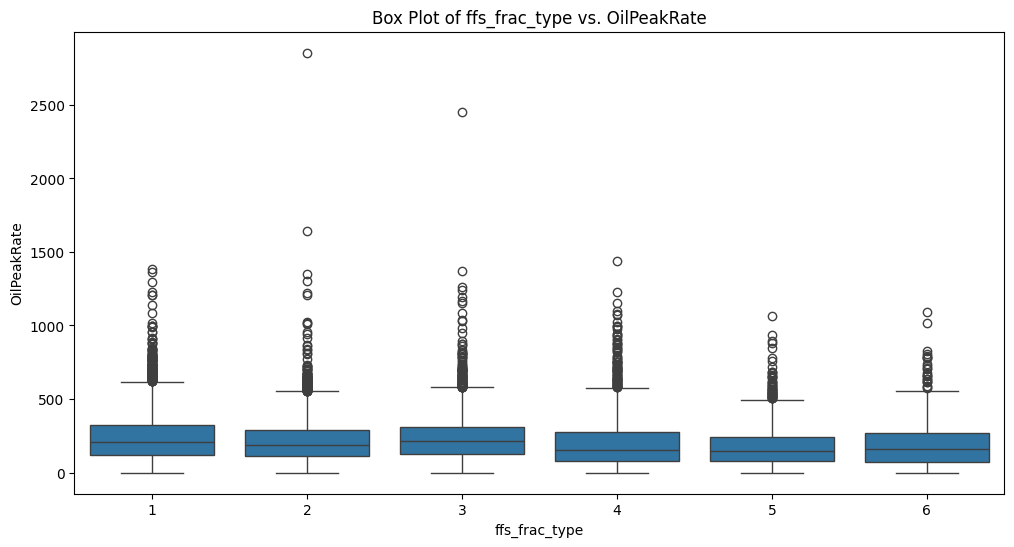

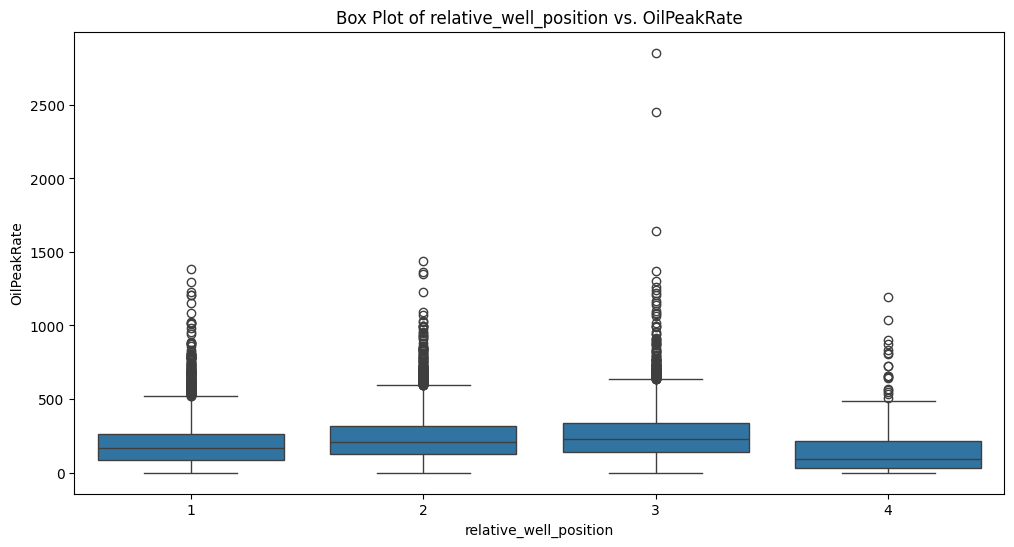

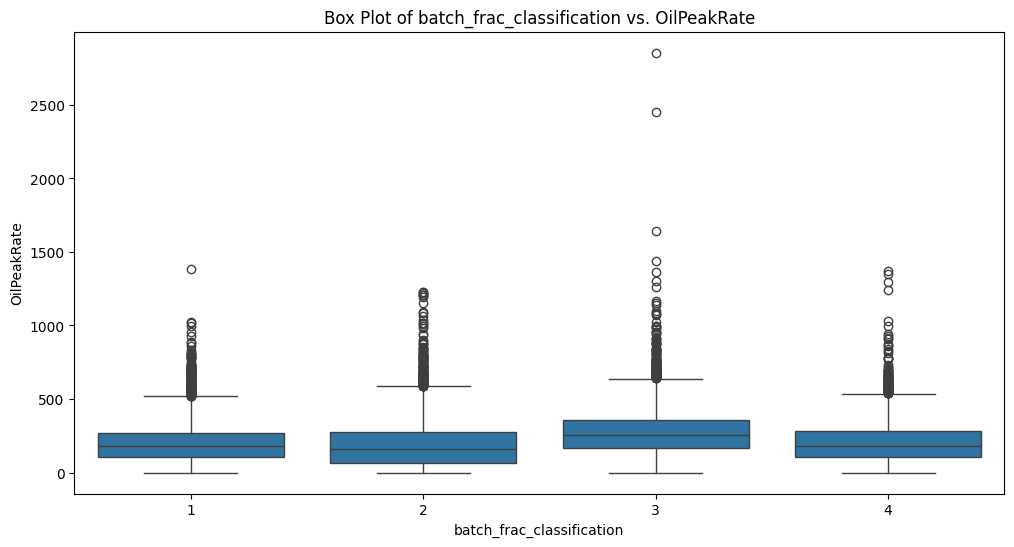

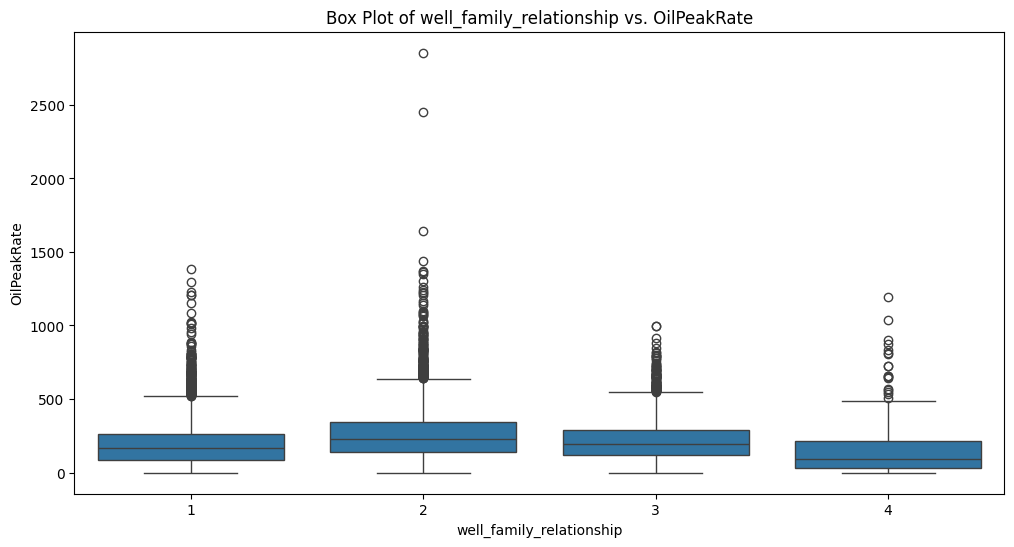

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



categorical_variables = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship',]

for variable in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=variable, y='OilPeakRate', data=df)
    plt.title(f'Box Plot of {variable} vs. OilPeakRate')
    plt.xlabel(variable)
    plt.ylabel('OilPeakRate')
    plt.show()


In [ ]:
# Categorical variables: Grouping
# https://www.kaggle.com/code/prakharrathi25/exploratory-data-analysis-step-by-step?scriptVersionId=14686450&cellId=59
import pandas as pd



categorical_variables = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', ]

for variable in categorical_variables:
    if variable in df.columns:
        pivot_table = pd.pivot_table(df, values='OilPeakRate', index=variable, aggfunc='mean')
        print(f"Pivot Table for {variable}:\n{pivot_table}\n")


Pivot Table for ffs_frac_type:
                             OilPeakRate
ffs_frac_type                           
Crosslink Only                187.435945
Linear Only                   190.690095
Slickwater Crosslink Hybrid   206.269056
Slickwater Linear Hybrid      222.605669
Slickwater Only               227.982614
Undefined                     198.299490

Pivot Table for relative_well_position:
                        OilPeakRate
relative_well_position             
1.0                      191.086254
2.0                      222.876867
3.0                      234.746426
4.0                      185.706418

Pivot Table for batch_frac_classification:
                           OilPeakRate
batch_frac_classification             
1.0                         200.886091
2.0                         193.195638
3.0                         248.857545
4.0                         202.880544

Pivot Table for well_family_relationship:
                          OilPeakRate
well_family_relationship 

In [ ]:
from scipy.stats import f_oneway

categorical_variables = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', ]


for variable in categorical_variables:
    if variable in df.columns:
        groups = [df['OilPeakRate'][df[variable] == group] for group in df[variable].unique()]
        f_statistic, p_value = f_oneway(*groups)

        print(f"ANOVA for {variable}:")
        print(f"F-statistic: {f_statistic}")
        print(f"P-value: {p_value}\n")



ANOVA for ffs_frac_type:
F-statistic: 55.59383611983452
P-value: 1.4340418532651713e-57

ANOVA for relative_well_position:
F-statistic: 248.06168681525483
P-value: 5.8856402022756715e-158

ANOVA for batch_frac_classification:
F-statistic: 297.0040647425793
P-value: 1.6580715269747096e-188

ANOVA for well_family_relationship:
F-statistic: 295.3819763486004
P-value: 1.6930132981829938e-187



In [ ]:
relevant_columns = key_numerical_variables + categorical_variables + ['OilPeakRate'] + ['bin_lateral_length', 'frac_fluid_intensity'] # TODO
df = df[relevant_columns]
relevant_columns #final dataset columns

['total_fluid',
 'gross_perforated_length',
 'true_vertical_depth',
 'ffs_frac_type',
 'relative_well_position',
 'batch_frac_classification',
 'well_family_relationship',
 'OilPeakRate',
 'bin_lateral_length',
 'frac_fluid_intensity']

In [ ]:


categorical_columns = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', ]


df_dummies_list = [pd.get_dummies(df[column], prefix=column, drop_first=True) for column in categorical_columns]

# # Modify dummy variable column names
# for i in range(len(df_dummies_list)):
#     # print(df_dummies_list[i].columns.str.split('_'))
#     df_dummies_list[i].columns = df_dummies_list[i].columns.str.split('_', 1).str[-1]
#     # print(df_dummies_list[i].columns)

df_combined = pd.concat([df] + df_dummies_list, axis=1)
df = df_combined

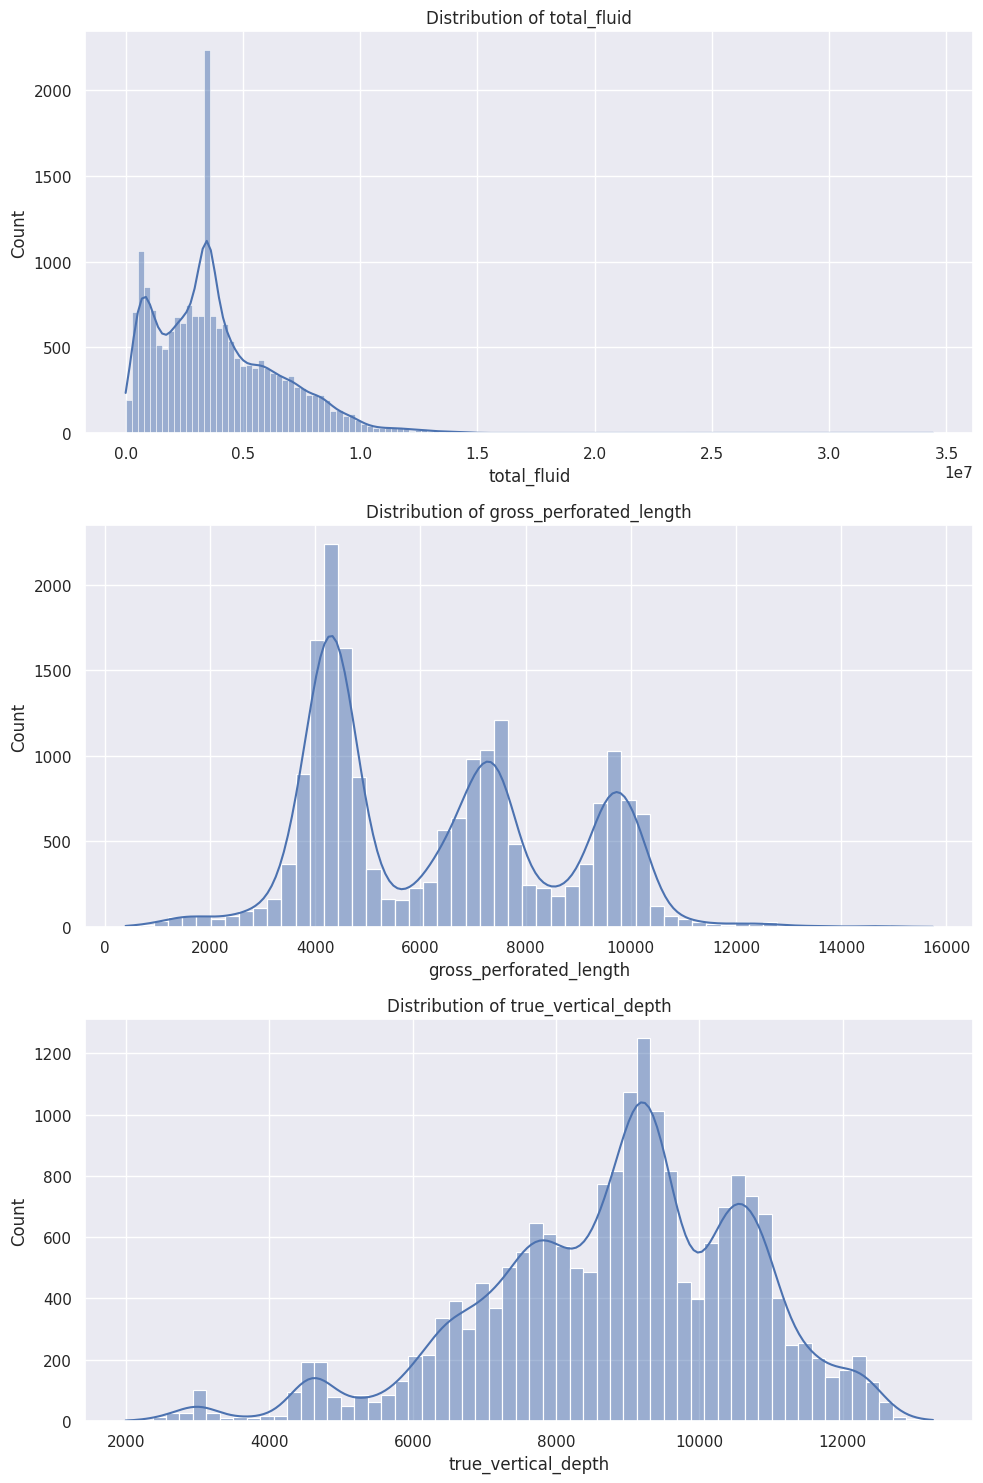

In [ ]:
fig, axes = plt.subplots(nrows=len(key_numerical_variables), ncols=1, figsize=(10, 5 * len(key_numerical_variables)))


for i, column in enumerate(key_numerical_variables):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


num_bins = 3
bins = pd.cut(df['gross_perforated_length'], bins=num_bins, labels=False)

df['gross_perforated_length_bins'] = bins

print(df[['gross_perforated_length', 'gross_perforated_length_bins']])


       gross_perforated_length  gross_perforated_length_bins
0                  3963.582677                             0
1                  3179.133858                             0
2                  3810.039370                             0
3                  3723.425197                             0
4                  3811.023622                             0
...                        ...                           ...
29432              4101.377953                             0
29433              4512.795276                             0
29434              3660.433071                             0
29435              5930.118110                             1
29436              6141.732283                             1

[19306 rows x 2 columns]


<ipython-input-141-7544c652303e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross_perforated_length_bins'] = bins


In [ ]:
drop = ['gross_perforated_length','ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', ]
df = df.drop(drop, axis=1)

# model

In [ ]:
# import pandas as pd
# df = pd.read_csv('/content/cleaned.csv')

In [ ]:
df.isna().sum()

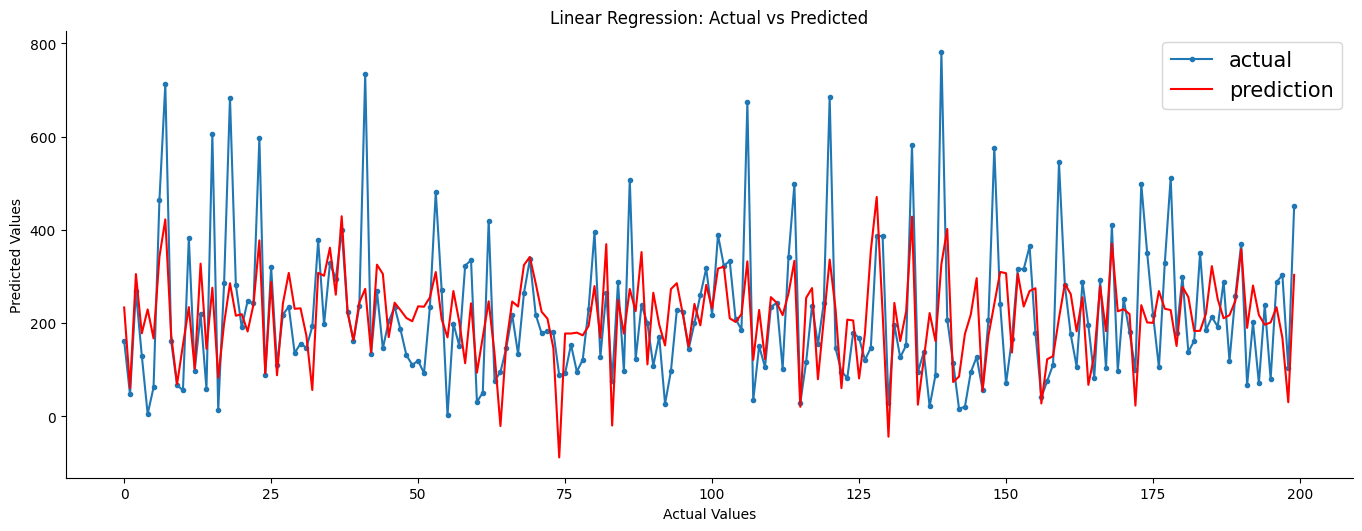

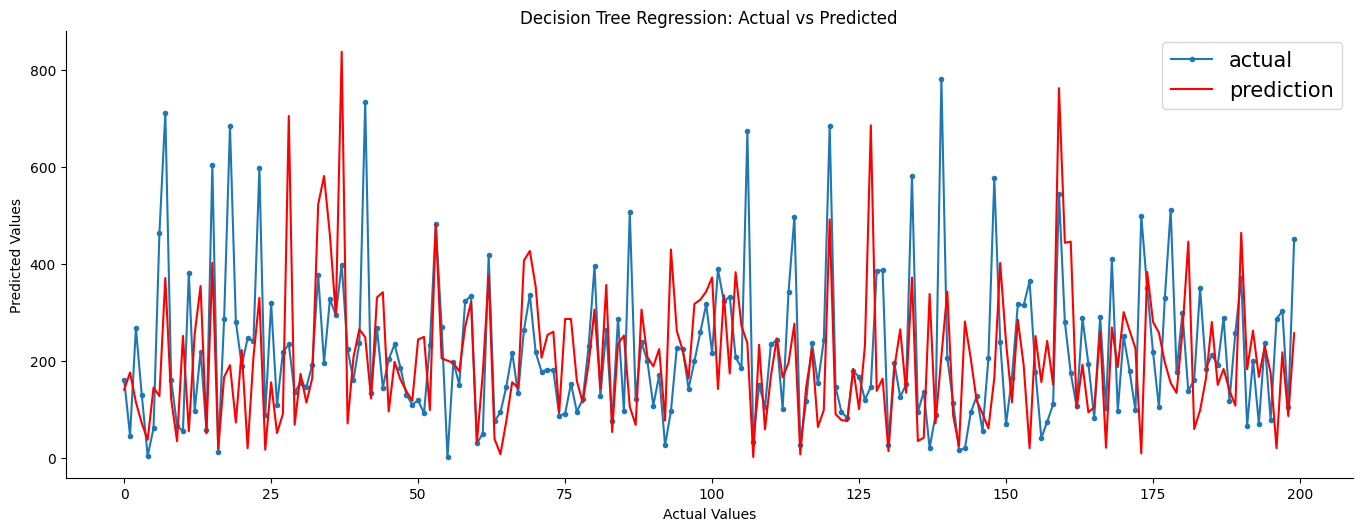

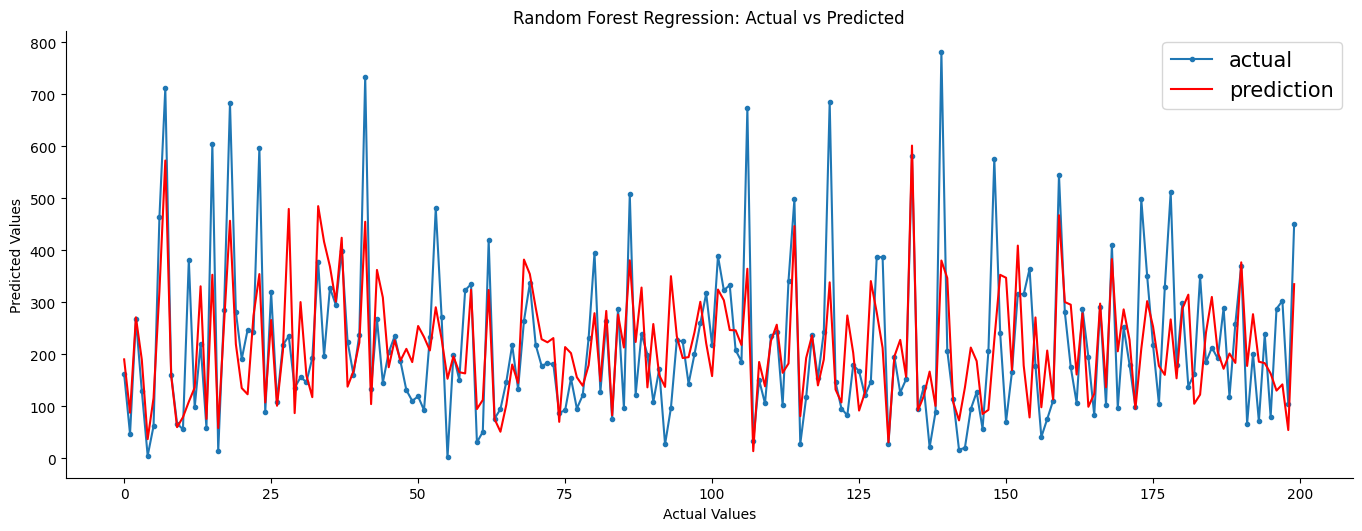

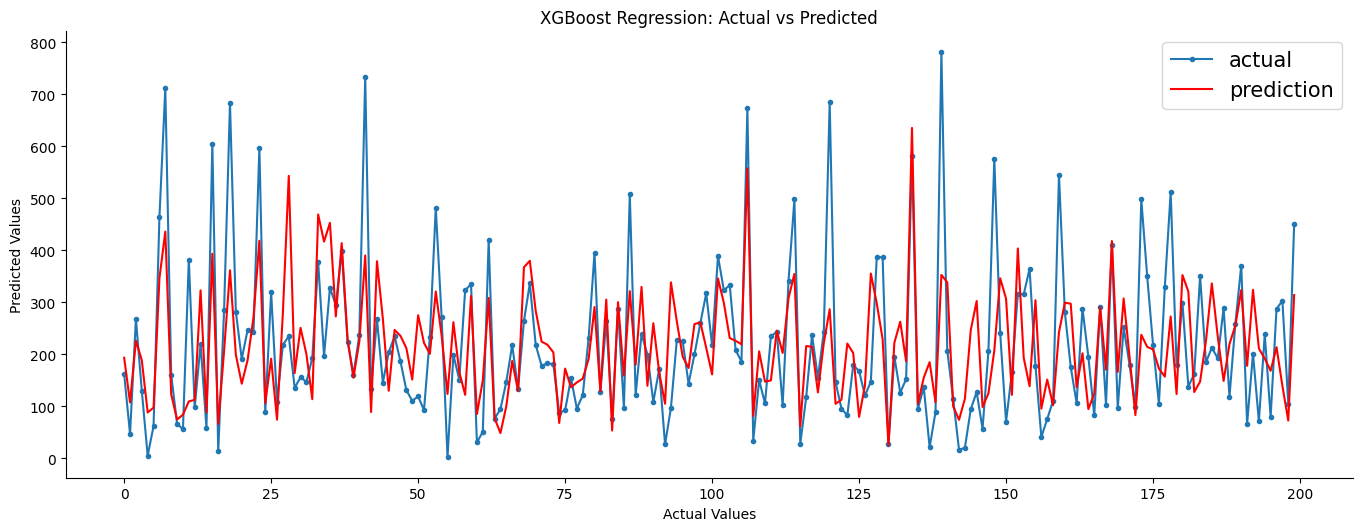

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPRegressor




X = df.drop('OilPeakRate', axis=1)
y = df['OilPeakRate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, linear_reg_predictions[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, dt_predictions[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, rf_predictions[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();


# XGBoost Regression
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, xgb_predictions[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('XGBoost Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();

In [ ]:
linear_reg_rmse = sqrt(mean_squared_error(y_test, linear_reg_predictions))
print(f"Linear Regression RMSE: {linear_reg_rmse}")


dt_rmse = sqrt(mean_squared_error(y_test, dt_predictions))
print(f"Decision Tree Regression RMSE: {dt_rmse}")


rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest Regression RMSE: {rf_rmse}")

xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"XGBoost Regression RMSE: {xgb_rmse}")

Linear Regression RMSE: 125.63539165990477
Decision Tree Regression RMSE: 159.3506007923096
Random Forest Regression RMSE: 113.94172192657635
XGBoost Regression RMSE: 116.5421713662871


Stacking (Random Forest + XGBoost) RMSE: 113.3714080456163


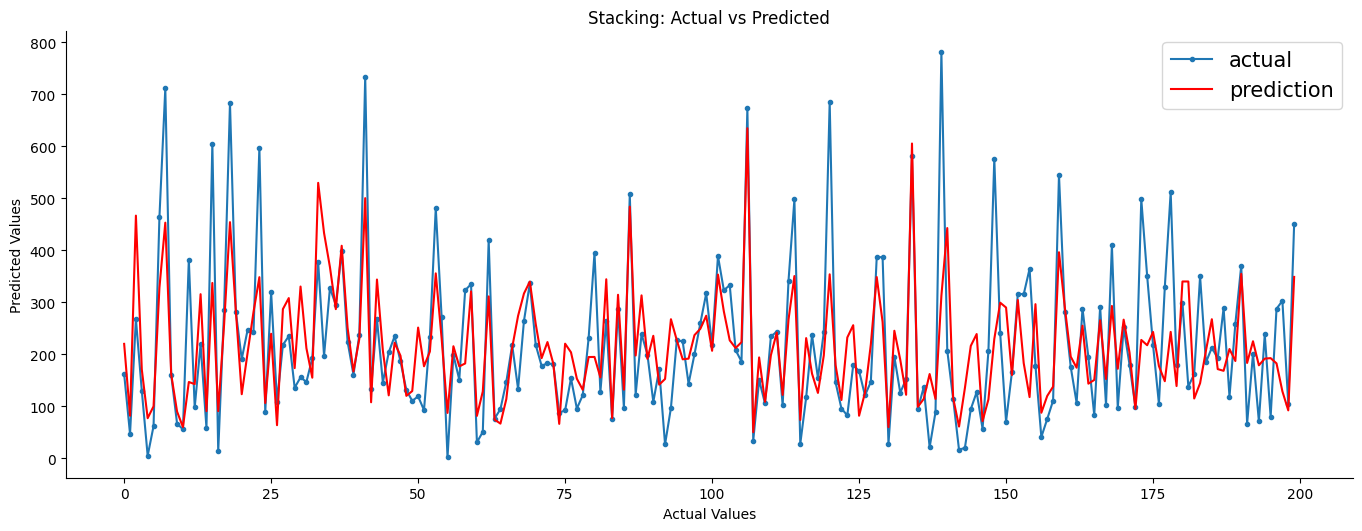

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
xgb_model = XGBRegressor(random_state=42)


stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions))
print(f"Stacking (Random Forest + XGBoost) RMSE: {stacking_rmse}")


aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, stacking_predictions[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Stacking: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();


Epoch 1/300
387/387 - 2s - loss: 69176.3203 - val_loss: 49803.5156 - 2s/epoch - 5ms/step
Epoch 2/300
387/387 - 1s - loss: 27946.4141 - val_loss: 19342.3320 - 1s/epoch - 3ms/step
Epoch 3/300
387/387 - 1s - loss: 21728.7812 - val_loss: 18208.1406 - 1s/epoch - 3ms/step
Epoch 4/300
387/387 - 1s - loss: 20812.6426 - val_loss: 17770.8125 - 1s/epoch - 3ms/step
Epoch 5/300
387/387 - 1s - loss: 20299.1562 - val_loss: 17429.4316 - 1s/epoch - 3ms/step
Epoch 6/300
387/387 - 1s - loss: 20135.7188 - val_loss: 17246.0801 - 885ms/epoch - 2ms/step
Epoch 7/300
387/387 - 1s - loss: 19590.8887 - val_loss: 17069.5781 - 999ms/epoch - 3ms/step
Epoch 8/300
387/387 - 1s - loss: 19815.6055 - val_loss: 16997.3906 - 1s/epoch - 3ms/step
Epoch 9/300
387/387 - 2s - loss: 19603.8496 - val_loss: 16815.9746 - 2s/epoch - 5ms/step
Epoch 10/300
387/387 - 2s - loss: 19636.8633 - val_loss: 16807.8125 - 2s/epoch - 4ms/step
Epoch 11/300
387/387 - 1s - loss: 19506.0645 - val_loss: 16658.9062 - 821ms/epoch - 2ms/step
Epoch 12/3

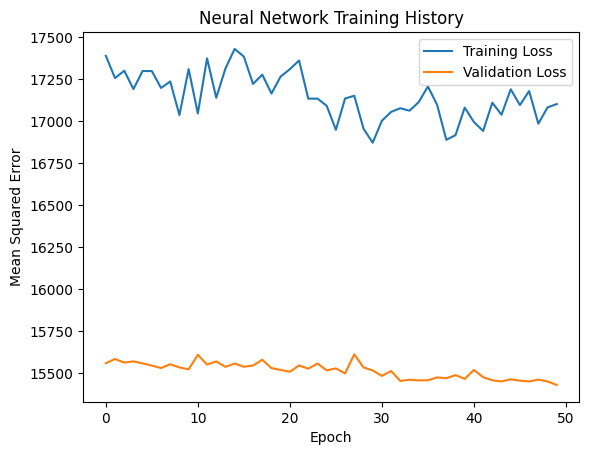

In [ ]:


model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1))


optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])




y_pred = model.predict(X_test)

nn_rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network RMSE: {nn_rmse}")


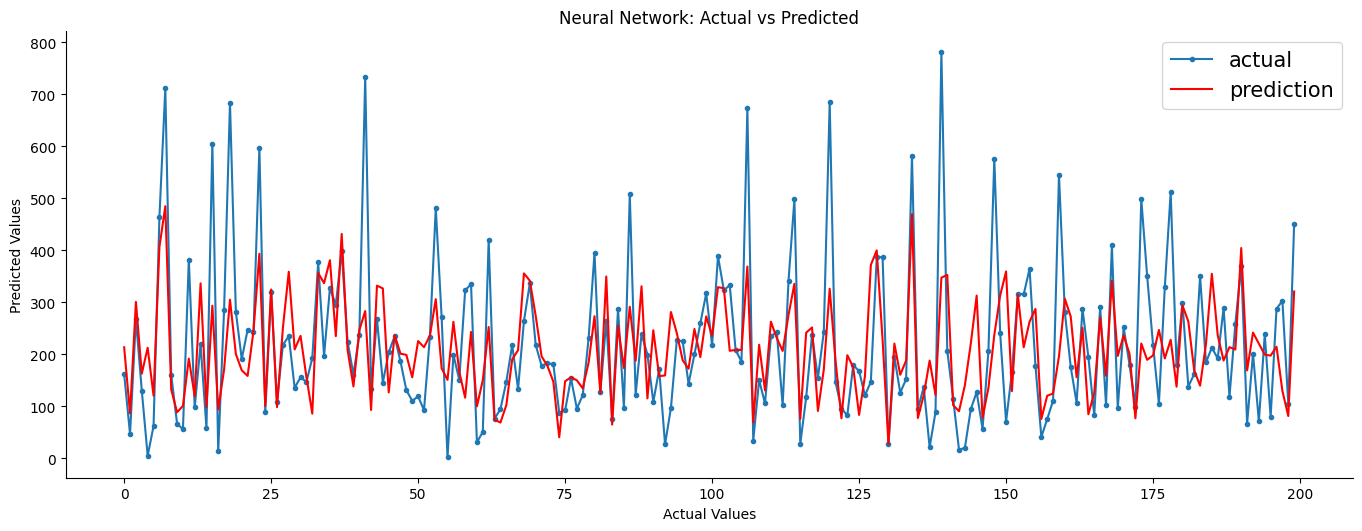

In [ ]:
import seaborn as sns
aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, y_pred[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();

Stacking (Random Forest + XGBoost + LinearRegression) RMSE: 113.8981398941654


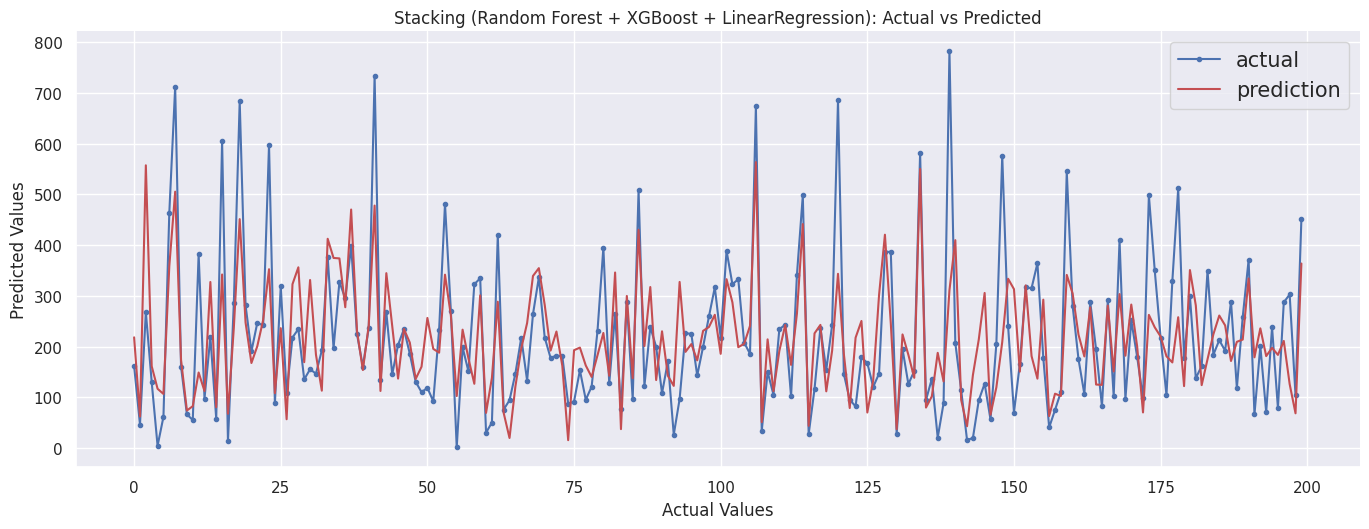

In [ ]:



rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
xgb_model = XGBRegressor(random_state=42)
nn_model = LinearRegression()

# Stacking
stacking_model = StackingRegressor(
    estimators=[ ('nn', nn_model),('rf', rf_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
stacking_predictions2 = stacking_model.predict(X_test)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_predictions2))
print(f"Stacking (Random Forest + XGBoost + LinearRegression) RMSE: {stacking_rmse}")

aa=[x for x in range(200)]
plt.figure(figsize=(14,5))
plt.plot(aa, y_test[:200], marker='.', label="actual")
plt.plot(aa, stacking_predictions2[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title('Stacking (Random Forest + XGBoost + LinearRegression): Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(fontsize=15)
plt.show();


In [ ]:
# save csv
df.to_csv('cleaned.csv')

# test